In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<AxesSubplot:>

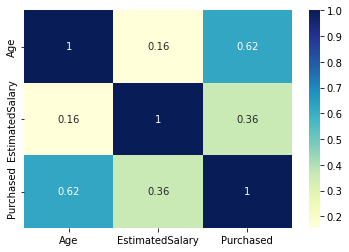

In [3]:
import seaborn as sns
sns.heatmap(data=dataset.corr(), annot=True, cmap='YlGnBu')

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print (X_train[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


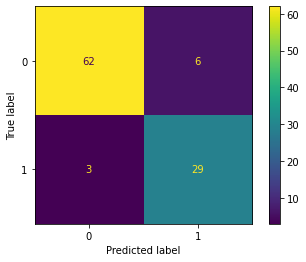

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("Test F1:",f1_score(y_test, y_pred))

Accuracy :  0.91
Precision: 0.8285714285714286
Recall: 0.90625
Test F1: 0.8656716417910447


In [10]:
y_pred = classifier.predict(X_train)

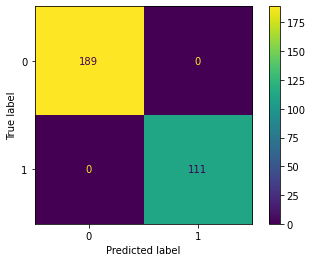

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_train,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy : ", accuracy_score(y_train, y_pred))
print("Precision:",precision_score(y_train, y_pred))
print("Recall:",recall_score(y_train, y_pred))
print("Test F1:",f1_score(y_train, y_pred))

Accuracy :  1.0
Precision: 1.0
Recall: 1.0
Test F1: 1.0


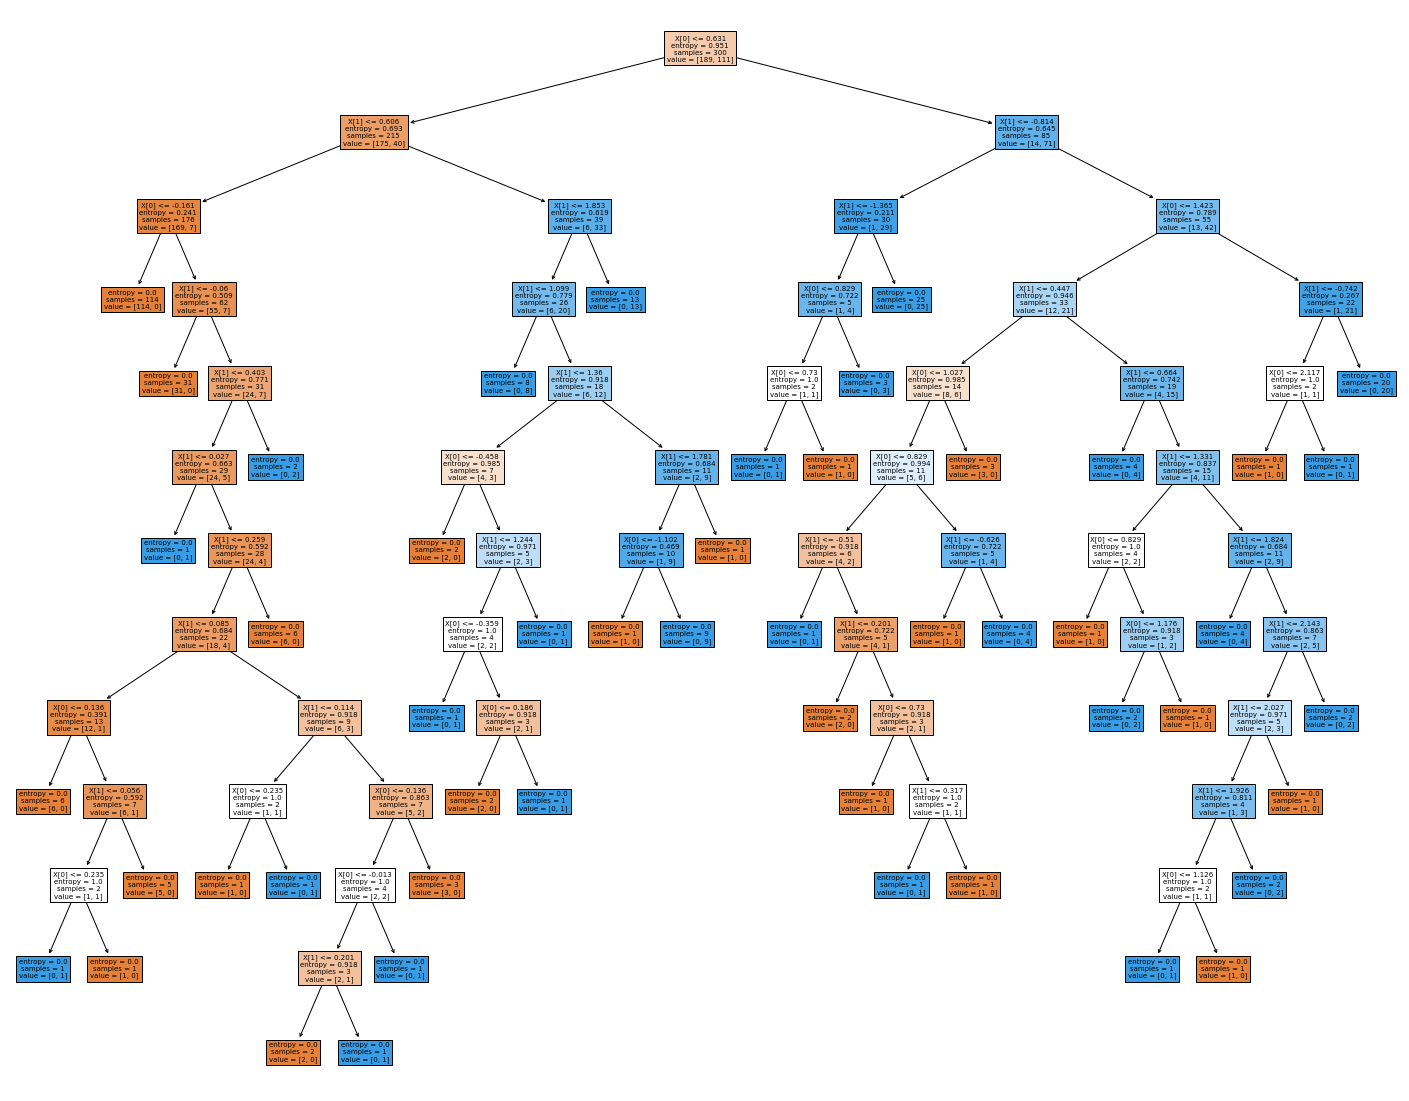

In [13]:
from sklearn.tree import plot_tree
from sklearn import tree
fig=plt.figure(figsize=(25,20))
tr=tree.plot_tree(classifier,filled=True)